<a href="https://colab.research.google.com/github/RYUNSUN/TIL_/blob/master/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0(%EB%94%A5%EB%9F%AC%EB%8B%9D)%20%ED%99%9C%EC%9A%A9%20AI%20%EC%84%A4%EA%B3%84/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%20%ED%99%9C%EC%9A%A9_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/Code/Code40_01%20%ED%86%A0%ED%81%B0%ED%99%94%2C%20%ED%92%88%EC%82%AC%ED%83%9C%EA%B9%85%2C%20%20LSTM%20%EA%B8%B0%EB%B0%98%20%EB%89%B4%EC%8A%A4%20%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC%20%EB%B6%84%EB%A5%98%20%EB%B0%8F%20%20%EB%84%A4%EC%9D%B4%EB%B2%84%20%EC%98%81%ED%99%94%20%EB%A6%AC%EB%B7%B0%20%EA%B0%90%EC%84%B1%20%EB%B6%84%EB%A5%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 토큰화, 품사 태깅

In [0]:
from nltk import word_tokenize, pos_tag, ne_chunk

In [72]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [73]:
sentence="홍길동이는 오늘 멀티캠퍼스에 지각했습니다"
pos_tag(word_tokenize(sentence)) # 토큰화, 품사태깅

[('홍길동이는', 'JJ'), ('오늘', 'NNP'), ('멀티캠퍼스에', 'NNP'), ('지각했습니다', 'NN')]

In [74]:
sentence="James is working Samsung in Suwon"
sentence=pos_tag(word_tokenize(sentence))
print(sentence)

[('James', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('Samsung', 'NNP'), ('in', 'IN'), ('Suwon', 'NNP')]


In [75]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [0]:
ne_chunk(sentence) # 개체 유형 출력
# 출력 결과 : Tree('S', [Tree('PERSON', [('James', 'NNP')]), ('is', 'VBZ'), ('working', 'VBG'), Tree('PERSON', [('Samsung', 'NNP')]), ('in', 'IN'), Tree('GPE', [('Suwon', 'NNP')])])

개체명 태깅 : 
https://raw.githubusercontent.com/Franck-Dernoncourt/NeuroNER/master/neuroner/data/conll2003/en/train.txt  
데이터를 가져와서 개체명을 직접 줄 수 있음

## LSTM을 이용한 분류 실습

In [0]:
from keras.datasets import reuters

In [10]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(xtrain, ytrain),(xtest, ytest) = reuters.load_data(num_words=None, test_split=0.2) 
# num_words=1000은 1000등 안에 있는 단어들만 가져와라

# restore np.load for future normal usage
np.load = np_load_old

2113536/2110848 [==============================] - 2s 1us/step


In [11]:
xtrain[0]
# 단어들의 빈도에 따라 인덱스가 부여가 된 상태임
# 1 => 등장 빈도수가 1등
# 27595 => 등장 빈도수가 27595 등
# ex) The ... ... ...

len(xtrain) # 8982개의 뉴스기사
xtrain[8981] 

[1,
 227,
 2406,
 91,
 21969,
 125,
 2855,
 21,
 4,
 3976,
 76,
 7,
 4,
 757,
 481,
 3976,
 790,
 5259,
 5654,
 9,
 111,
 149,
 8,
 7,
 10,
 76,
 223,
 51,
 4,
 417,
 8,
 1047,
 91,
 6917,
 1688,
 340,
 7,
 194,
 9411,
 6,
 1894,
 21,
 127,
 2151,
 2394,
 1456,
 6,
 3034,
 4,
 329,
 433,
 7,
 65,
 87,
 1127,
 10,
 8219,
 1475,
 290,
 9,
 21,
 567,
 16,
 1926,
 24,
 4,
 76,
 209,
 30,
 4033,
 6655,
 5654,
 8,
 4,
 60,
 8,
 4,
 966,
 308,
 40,
 2575,
 129,
 15562,
 295,
 277,
 1071,
 9,
 24,
 286,
 2114,
 234,
 222,
 9,
 4,
 906,
 3994,
 8519,
 114,
 5758,
 1752,
 7,
 4,
 113,
 17,
 12]

In [12]:
xtest[0]
len(xtest) # 2246

2246

In [13]:
ytrain[0]
# xtrain[0]

3

In [14]:
# 뉴스 카테고리는 46개로 분류
max(ytrain)+1 

46

In [15]:
len(xtrain) # 8982
len(xtest) #2246
num_classes=max(ytrain)+1
num_classes # 카테고리 수 

46

In [16]:
print(max(len(line) for line in xtrain)) # 최대 뉴스기사 길이
sum(map(len, xtrain)) # 뉴스기사 길이에 대한 전체 합 (전체 뉴스에 대한 총 단어의 개수)
sum(map(len, xtrain)) / len(xtrain) # 평균 뉴스기사 길이 145

2376


145.5398574927633

(array([2.292e+03, 2.917e+03, 1.098e+03, 8.240e+02, 4.880e+02, 3.410e+02,
        2.480e+02, 1.640e+02, 1.160e+02, 1.180e+02, 7.600e+01, 5.900e+01,
        6.400e+01, 4.300e+01, 4.700e+01, 2.800e+01, 2.500e+01, 1.500e+01,
        1.000e+01, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  13.  ,   60.26,  107.52,  154.78,  202.04,  249.3 ,  296.56,
         343.82,  391.08,  438.34,  485.6 ,  532.86,  580.12,  627.38,
         674.64,  721.9 ,  769.16,  816.42,  863.68,  910.94,  958.2 ,
        1005.46, 1052.72, 1099.98, 1147.24, 1194.5 , 1241.76, 1289.02,
        1336.28, 1383.54, 1430.8 , 1478.06, 1525.32, 1572.58, 1619.84,
        1667.1 , 1714

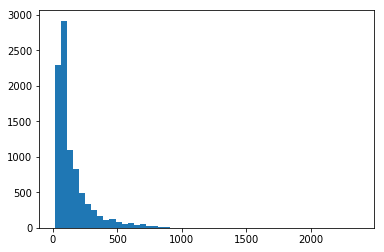

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist([len(s) for s in xtrain], bins=50)
# 각 뉴스기사의 단어가 1000미만이 기사가 대부분

In [0]:
# 각각의 뉴스가 해당하는 카테고리 시각화
import seaborn as sns

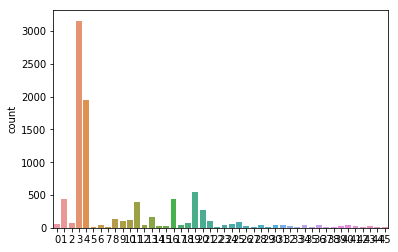

In [19]:
sns.countplot(ytrain)

In [20]:
np.unique(ytrain, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 array([  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
         390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
          15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
          11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
          12,   18]))

In [0]:
unique_elements, counts_elements=np.unique(ytrain, return_counts=True)

In [22]:
unique_elements
counts_elements

array([  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
        390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
         15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
         11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
         12,   18])

In [23]:
dict(zip(unique_elements, counts_elements))
# np.asarray((unique_elements, counts_elements))

{0: 55,
 1: 432,
 2: 74,
 3: 3159,
 4: 1949,
 5: 17,
 6: 48,
 7: 16,
 8: 139,
 9: 101,
 10: 124,
 11: 390,
 12: 49,
 13: 172,
 14: 26,
 15: 20,
 16: 444,
 17: 39,
 18: 66,
 19: 549,
 20: 269,
 21: 100,
 22: 15,
 23: 41,
 24: 62,
 25: 92,
 26: 24,
 27: 15,
 28: 48,
 29: 19,
 30: 45,
 31: 39,
 32: 32,
 33: 11,
 34: 50,
 35: 10,
 36: 49,
 37: 19,
 38: 19,
 39: 24,
 40: 36,
 41: 30,
 42: 13,
 43: 21,
 44: 12,
 45: 18}

In [24]:
word_index=reuters.get_word_index() # 빈도수에 따라서 인덱스가 부여됨, 값이 작을수록 빈도수가 높은 단어
word_index

557056/550378 [==============================] - 1s 2us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [0]:
# 빈도수가 높은 순서대로 출력할 수 있는 딕셔너리 생성
index_to_word={}
for key, value in word_index.items():
  index_to_word[value]=key

In [26]:
index_to_word[2]

'of'

In [27]:
# 뉴스기사 원문 복원
print(" ".join([index_to_word[x] for x in xtrain[1]]))

the termination payment airport takes 6 visibility geological 3 6 602 begin up said fully bank expects commodity total is giant a recreation this takes leroy series termination payment airport mln a for capital 1 pre 50 american east said in council takes leroy recommend's france a but u any 4 s 1st losses pct dlrs


## LSTM을 이용한 뉴스 분류

In [0]:
np_load_old = np.load
# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(xtrain, ytrain), (xtest, ytest) = reuters.load_data(num_words=1000, test_split=0.2)
# 단어 등장 빈도수가 1000등 안에 있는 단어들 대상

# restore np.load for future normal usage
np.load = np_load_old

In [0]:
# 단어 등장 빈도수가 1000등 안에 있는 단어들 대상
max_len=100 # 100개 => 뉴스에서 단어의 개수가 100개 넘으면 100개 저장, 부족하면 0으로 채우자

from keras.preprocessing import sequence
xtrain=sequence.pad_sequences(xtrain, maxlen=max_len)
xtest=sequence.pad_sequences(xtest, maxlen=max_len)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

In [80]:
# ytrain, ytest 원핫인코딩 변환
ytrain=np_utils.to_categorical(ytrain)
ytrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [81]:
ytest=np_utils.to_categorical(ytest)
ytest

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
model = Sequential()
model.add(Embedding(1000, 128)) 
#                  (단어벡터수, 임베딩 벡터의 차원)
model.add(LSTM(128))
model.add(Dense(46, activation="softmax"))

W0828 23:38:48.583770 140389552650112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 23:38:48.625336 140389552650112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 23:38:48.633245 140389552650112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0828 23:38:53.154918 140389552650112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0828 23:38:53.183097 140389552650112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [35]:
history=model.fit(xtrain, ytrain, batch_size=100, epochs=20, validation_data=(xtest,ytest))

W0828 23:38:56.376614 140389552650112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0828 23:38:57.055773 140389552650112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 16s 2ms/step - loss: 2.5571 - acc: 0.3566 - val_loss: 2.0867 - val_acc: 0.4889
Epoch 2/20
8982/8982 [==============================] - 11s 1ms/step - loss: 2.0270 - acc: 0.4970 - val_loss: 1.9853 - val_acc: 0.5102
Epoch 3/20
8982/8982 [==============================] - 11s 1ms/step - loss: 1.9339 - acc: 0.5198 - val_loss: 1.7865 - val_acc: 0.5606
Epoch 4/20
8982/8982 [==============================] - 12s 1ms/step - loss: 1.7389 - acc: 0.5625 - val_loss: 1.7095 - val_acc: 0.5708
Epoch 5/20
8982/8982 [==============================] - 11s 1ms/step - loss: 1.6105 - acc: 0.5847 - val_loss: 1.6503 - val_acc: 0.5819
Epoch 6/20
8982/8982 [==============================] - 12s 1ms/step - loss: 1.5246 - acc: 0.6092 - val_loss: 1.5951 - val_acc: 0.6015
Epoch 7/20
8982/8982 [==============================] - 11s 1ms/step - loss: 1.4502 - acc: 0.6312 - val_loss: 1.5216 - val_acc: 0.6224
Epoch 8

In [36]:
print("테스트 정확도:", model.evaluate(xtest,ytest)[1])

2246/2246 [==============================] - 2s 915us/step
테스트 정확도: 0.7168299199106007


In [0]:
import matplotlib.pyplot as plt

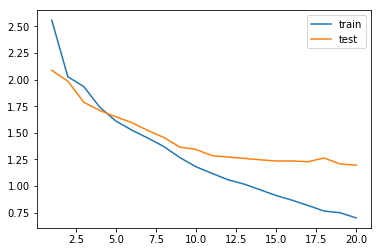

In [38]:
epochs=range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.legend(['train','test'], loc='upper right')
plt.show()

## LSTM 기반 네이버 영화 리뷰 감성 분류기

In [82]:
import pandas as pd
trainData=pd.read_table("/content/drive/My Drive/빅데이터(딥러닝) 활용 AI 설계/빅데이터 활용_머신러닝/Data/data/nsmc-master/ratings_train.txt")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [83]:
len(trainData)

150000

In [84]:
trainData

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [85]:
testData=pd.read_table("/content/drive/My Drive/빅데이터(딥러닝) 활용 AI 설계/빅데이터 활용_머신러닝/Data/data/nsmc-master/ratings_test.txt")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [86]:
len(testData)

50000

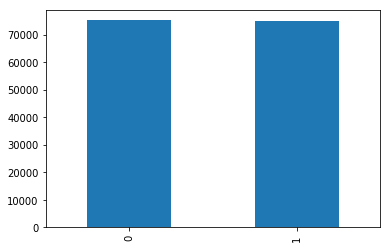

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
trainData['label'].value_counts().plot(kind='bar')

In [88]:
#trainData.groupby('label').size()
trainData.groupby("label").size().reset_index(name='count')

,label,count
0,0,75173
1,1,74827


In [89]:
# 리뷰 중에 null이 있는지 확인?
trainData.isnull().values.any()

True

In [90]:
# 컬럼 단위로 null 개수
trainData.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [91]:
# 리뷰가 null인 데이터 출력
# trainData[trainData["document"].isnull()==True]
trainData[trainData.document.isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [92]:
trainData=trainData.dropna(how='any') # null 값이 있는 행 제거
trainData[trainData.document.isnull()]
len(trainData)

149995

In [93]:
#1. 영어 제거(정규표현식) -> [a-zA-Z], sub, replace
import re
text="do!! you expec... To~ read~, ~!! ??@"
# 공백, 영문자를 제외하고 모두 제거
# re.sub(정규식,바꾸려고 하는 문자 ,text)
re.sub('[^a-zA-Z ]',"",text)

'do you expec To read  '

In [94]:
# ㄱ ~ ㅎ : 유니코드
# ㅏ ~ ㅣ : 유니코드
# 한글만 남기기 
trainData['document']=trainData['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# trainData['documnet']
trainData[:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [0]:
!apt-get update

!apt-get install g++ openjdk-8-jdk python-dev python3-dev

!pip3 install JPype1-py3

!pip3 install konlpy

!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"

In [53]:
pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 2.7MB 35.1MB/s 


In [95]:
import konlpy
from konlpy.tag import Okt # Twitter
okt=Okt()
okt.morphs("포스터보고 초딩영화줄오버연기조차 가볍지 않구나")

['포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍지', '않구나']

In [96]:
okt.morphs("포스터보고 초딩영화줄오버연기조차 가볍지 않구나", stem=True)

['포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다']

In [0]:
stopwords=['의','가','이','은','하다','한','와','에','으로','자','과','도','걍','잘','좀','는','들','을','를','것','나']

In [98]:
okt.morphs("에이 이런 것도 영화냐? 차라리 집에서 티브이나 보겠다", stem=True)

['에이', '이렇다', '것', '도', '영화', '냐', '?', '차라리', '집', '에서', '티브이', '나', '보다']

In [58]:
len(trainData)

149995

In [0]:
xtrain = []

for sentence in trainData['document']:
    tempx = []
    tempx = okt.morphs(sentence, stem=True)
    tempx = [word for word in tempx if not word in stopwords]
    xtrain.append(tempx)

In [0]:
# test 데이터에 대해서도 동일한 전처리 과정 수행
testData=trainData.dropna(how='any') # null 값이 있는 행 제거
testData[trainData.document.isnull()]
testData['document']=testData['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

xtest=[]
for sentence in testData['document']:
  tempx=[]
  tempx=okt.morphs(sentence, stem=True)
  tempx=[word for word in tempx if not word in stopwords]
  xtest.append(tempx)

In [0]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=30000)
tokenizer.fit_on_texts(xtrain)
xtrain=tokenizer.texts_to_sequences(xtrain)
xtest=tokenizer.texts_to_sequences(xtest)

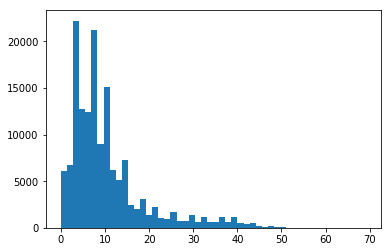

In [102]:
# 리뷰 단어 최대 길이
# 리뷰 평균 길이

max(len(line) for line in xtrain) # 리뷰 최대 길이
sum(map(len, xtrain)) / len(xtrain) # 평균 길이
# 시각화 확인
plt.hist([len(s) for s in xtrain], bins=50)
plt.show()

# LSTM 영화 리뷰 감성 분석기 제작 

In [0]:
ytrain=trainData["label"]
ytest=testData["label"]

In [0]:
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
maxLen=30 # 데이터 최대 길이를 30으로 설정
xtrain=pad_sequences(xtrain, maxlen=maxLen)
xtest=pad_sequences(xtest, maxlen=maxLen)

In [0]:
model=Sequential()
model.add(Embedding(30000,100))
model.add(LSTM(128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=["accuracy"])

In [107]:
history = model.fit(xtrain, ytrain, epochs=4, batch_size=60, validation_split=0.2)

Train on 119996 samples, validate on 29999 samples
Epoch 1/4
119996/119996 [==============================] - 86s 718us/step - loss: 0.3888 - acc: 0.8234 - val_loss: 0.3509 - val_acc: 0.8424
Epoch 2/4
119996/119996 [==============================] - 84s 704us/step - loss: 0.3291 - acc: 0.8551 - val_loss: 0.3380 - val_acc: 0.8502
Epoch 3/4
119996/119996 [==============================] - 84s 701us/step - loss: 0.3030 - acc: 0.8699 - val_loss: 0.3318 - val_acc: 0.8560
Epoch 4/4
119996/119996 [==============================] - 84s 696us/step - loss: 0.2812 - acc: 0.8823 - val_loss: 0.3294 - val_acc: 0.8582


In [108]:
model.evaluate(xtest, ytest)[1]

149995/149995 [==============================] - 45s 298us/step


0.8857495249857557

In [109]:
history.history

{'acc': [0.8234274491055289,
  0.8551201719161474,
  0.8699289979312876,
  0.8823210766837694],
 'loss': [0.38884845275676877,
  0.329053972650468,
  0.302970749165516,
  0.2811581276511406],
 'val_acc': [0.84236141320145,
  0.8502283424646673,
  0.8559952010241797,
  0.858161940078401],
 'val_loss': [0.35092998058614167,
  0.3379544793363372,
  0.3318421336097588,
  0.3294086625233957]}

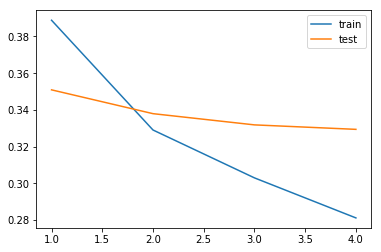

In [110]:
epochs = range(1, len(history.history["acc"])+1)
plt.plot(epochs, history.history["loss"], label="train")
plt.plot(epochs, history.history["val_loss"], label="test")
plt.legend(loc="upper right")
plt.show()

### IMDB 캐글 영화 리뷰 데이터 -> LSTM으로 구현

In [0]:
from keras.datasets import imdb
(xtrain, ytrain),(xtest, ytest)=imdb.load_data(num_words=10000)
# 데이터 확인

# 훈련시 빈도 순위가 5000 이상인 단어들만 사용
(xtrain, ytrain),(xtest, ytest)=imdb.load_data(num_words=5000)
# maxLen=500 지정